### EDA on Geldium’s dataset to identify deliquency Indicators
**The purpose of this report is to explore and analyze customer financial behavior and identify risk indicators for delinquent accounts. The goal is to prepare clean, meaningful data for predictive modeling and business insights using EDA techniques.**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv(r'C:\Users\prati\Desktop\DataProjects\Delinquency_prediction_dataset.csv')

In [7]:
df

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,EMP,18,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,1,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,15,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,11,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,CUST0496,71,48307.0,688.0,0.486522,2,0,12707.0,0.373033,retired,9,Business,Phoenix,On-time,On-time,Missed,On-time,On-time,Late
496,CUST0497,60,86180.0,836.0,0.608174,2,1,45595.0,0.291943,Unemployed,18,Student,Houston,On-time,On-time,Late,Late,Late,Missed
497,CUST0498,54,152326.0,847.0,0.676950,0,0,44449.0,0.104839,Employed,16,Student,Phoenix,On-time,Late,Late,On-time,Late,Missed
498,CUST0499,50,105852.0,343.0,0.700643,2,1,11155.0,0.236477,Employed,11,Student,Phoenix,Late,On-time,Late,Missed,On-time,Missed


In [11]:
df.shape
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           500 non-null    object 
 1   Age                   500 non-null    int64  
 2   Income                461 non-null    float64
 3   Credit_Score          498 non-null    float64
 4   Credit_Utilization    500 non-null    float64
 5   Missed_Payments       500 non-null    int64  
 6   Delinquent_Account    500 non-null    int64  
 7   Loan_Balance          471 non-null    float64
 8   Debt_to_Income_Ratio  500 non-null    float64
 9   Employment_Status     500 non-null    object 
 10  Account_Tenure        500 non-null    int64  
 11  Credit_Card_Type      500 non-null    object 
 12  Location              500 non-null    object 
 13  Month_1               500 non-null    object 
 14  Month_2               500 non-null    object 
 15  Month_3               5

Index(['Customer_ID', 'Age', 'Income', 'Credit_Score', 'Credit_Utilization',
       'Missed_Payments', 'Delinquent_Account', 'Loan_Balance',
       'Debt_to_Income_Ratio', 'Employment_Status', 'Account_Tenure',
       'Credit_Card_Type', 'Location', 'Month_1', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6'],
      dtype='object')

In [9]:
df.isnull().sum()

Customer_ID              0
Age                      0
Income                  39
Credit_Score             2
Credit_Utilization       0
Missed_Payments          0
Delinquent_Account       0
Loan_Balance            29
Debt_to_Income_Ratio     0
Employment_Status        0
Account_Tenure           0
Credit_Card_Type         0
Location                 0
Month_1                  0
Month_2                  0
Month_3                  0
Month_4                  0
Month_5                  0
Month_6                  0
dtype: int64

In [9]:
income_median=df["Income"].median()
df.loc[df["Income"].isnull(),"Income"] = income_median

In [11]:
loan_median=df["Loan_Balance"].median()
df.loc[df["Loan_Balance"].isnull(),"Loan_Balance"] = loan_median

In [13]:
credit_mean=df["Credit_Score"].mean()
df.loc[df["Credit_Score"].isnull(),"Credit_Score"] = credit_mean

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           500 non-null    object 
 1   Age                   500 non-null    int64  
 2   Income                500 non-null    float64
 3   Credit_Score          500 non-null    float64
 4   Credit_Utilization    500 non-null    float64
 5   Missed_Payments       500 non-null    int64  
 6   Delinquent_Account    500 non-null    int64  
 7   Loan_Balance          500 non-null    float64
 8   Debt_to_Income_Ratio  500 non-null    float64
 9   Employment_Status     500 non-null    object 
 10  Account_Tenure        500 non-null    int64  
 11  Credit_Card_Type      500 non-null    object 
 12  Location              500 non-null    object 
 13  Month_1               500 non-null    object 
 14  Month_2               500 non-null    object 
 15  Month_3               5

In [58]:
df.describe()

,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Account_Tenure
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,46.266000,108323.586000,577.716867,0.491446,2.968000,0.160000,48487.480000,0.298862,9.740000
std,16.187629,51523.389667,168.542432,0.197103,1.946935,0.366973,28536.522206,0.094521,5.923054
min,18.000000,15404.000000,301.000000,0.050000,0.000000,0.000000,612.000000,0.100000,0.000000
25%,33.000000,67610.500000,418.750000,0.356486,1.000000,0.000000,24847.000000,0.233639,5.000000
50%,46.500000,107658.000000,584.000000,0.485636,3.000000,0.000000,45776.000000,0.301634,10.000000
75%,59.250000,152572.250000,725.750000,0.634440,5.000000,0.000000,73809.500000,0.362737,15.000000
max,74.000000,199943.000000,847.000000,1.025843,6.000000,1.000000,99620.000000,0.552956,19.000000


**Univariate Analysis**

In [40]:
categorical_cols = ['Employment_Status', 'Location', 'Credit_Card_Type', 'Delinquent_Account']


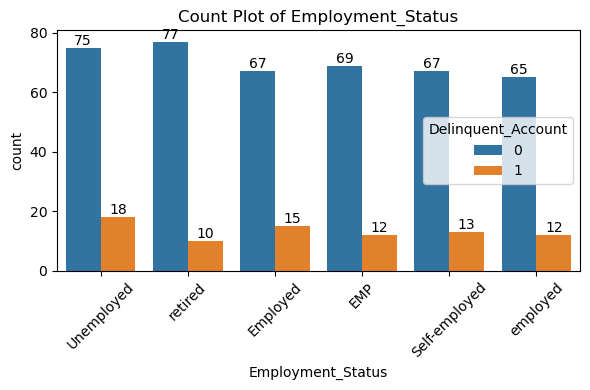

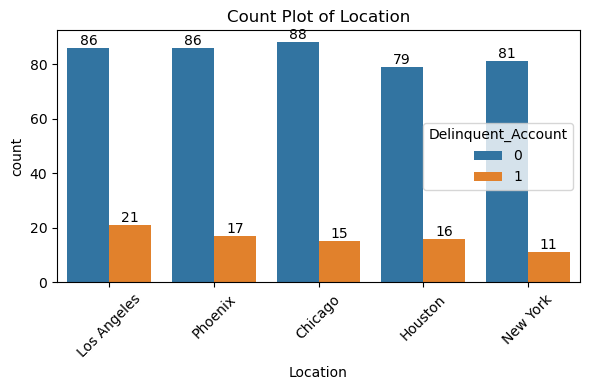

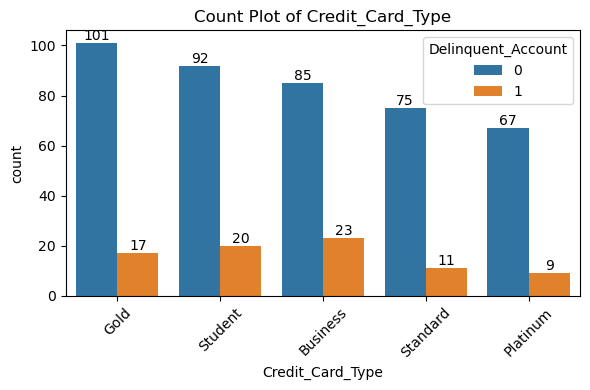

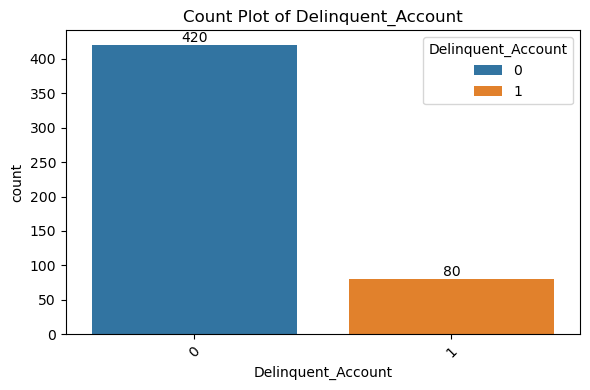

In [56]:
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(data=df, x=col, hue='Delinquent_Account', order=df[col].value_counts().index)
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)  # Rotate labels for readability
    plt.tight_layout()
    plt.show()


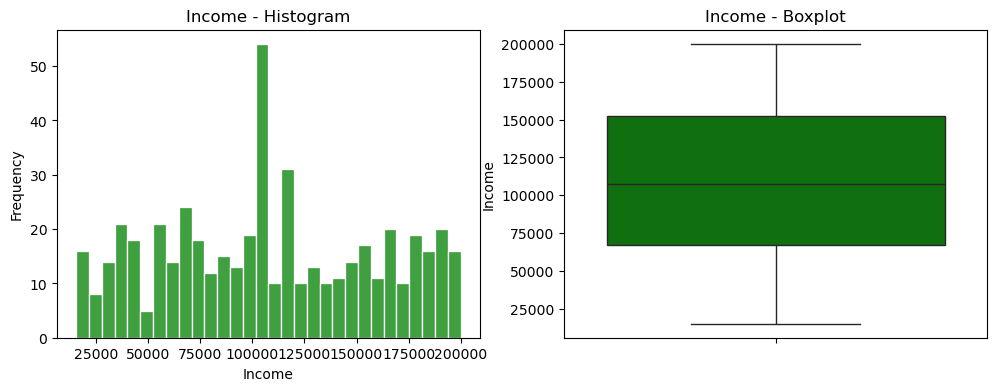

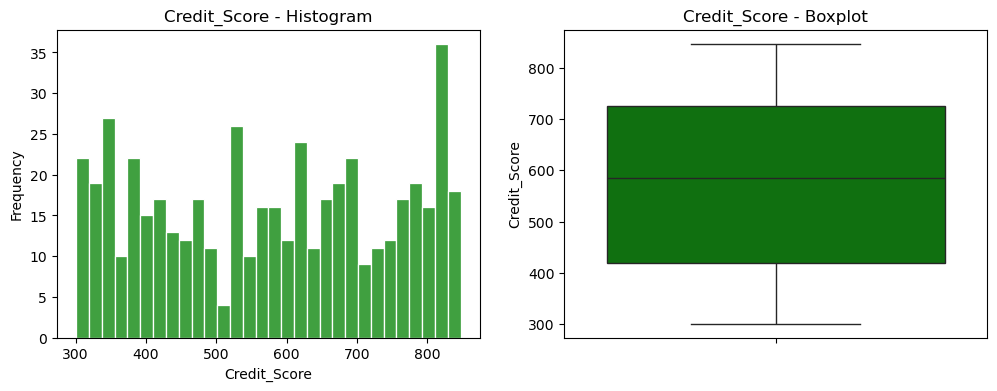

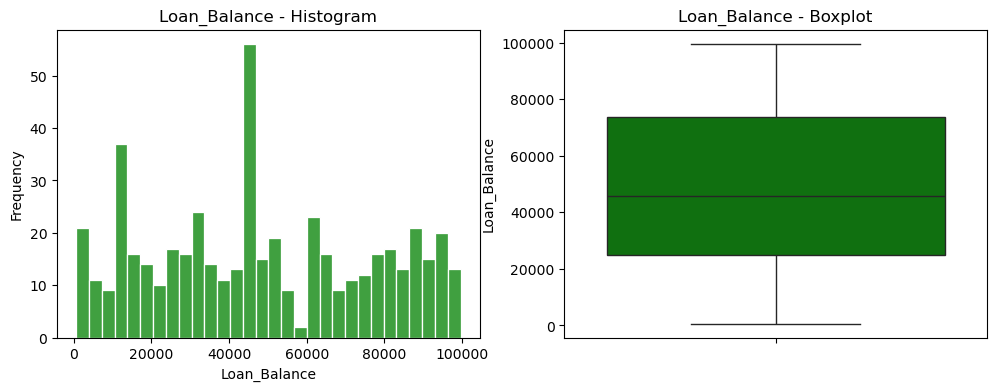

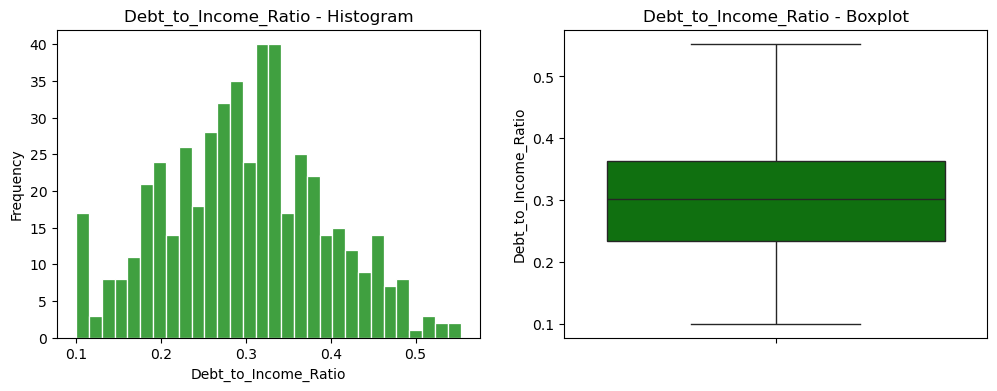

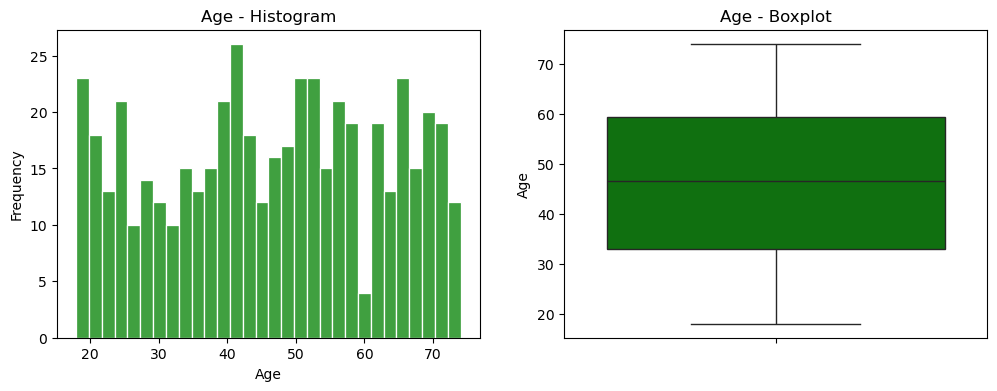

In [29]:
#  Analyzing numerical columns
numeric_cols=["Income", "Credit_Score", "Loan_Balance", "Debt_to_Income_Ratio", "Age"]
for col in numeric_cols:
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col], bins=30, color='green', edgecolor='white')
    plt.title(f"{col} - Histogram")
    plt.xlabel(col)
    plt.ylabel("Frequency")
#boxplot
    plt.subplot(1,2,2)
    sns.boxplot(df[col],color='green', vert=True,patch_artist=True)
    plt.title(f"{col} - Boxplot")
    plt.ylabel(col)
    plt.show()


**Bivariate Analysis**

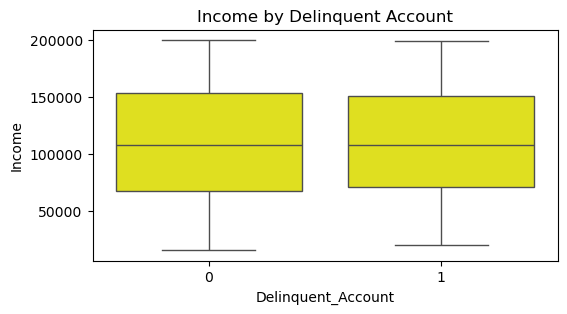

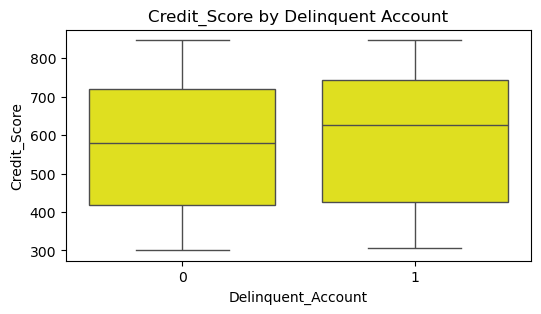

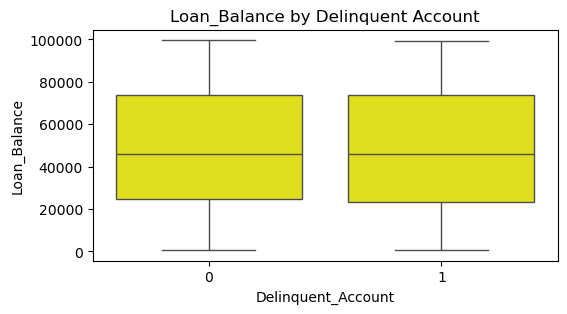

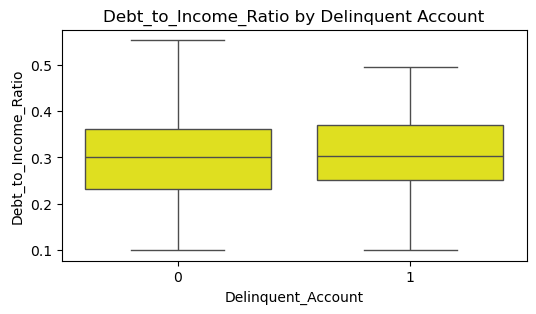

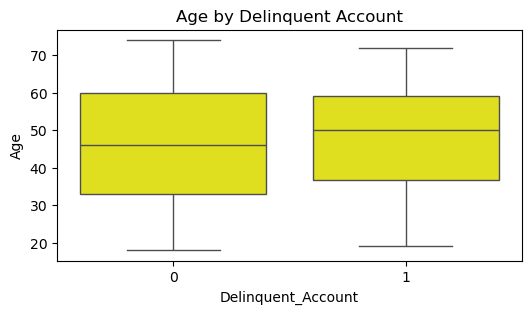

In [40]:
num_cols = ["Income", "Credit_Score", "Loan_Balance", "Debt_to_Income_Ratio", "Age"]
for col in num_cols:
    plt.figure(figsize = (6,3))
    sns.boxplot(data=df, x="Delinquent_Account", y=col,color='yellow')
    plt.title(f"{col} by Delinquent Account")
    plt.show()

In [50]:
#correcting data consistency
df['Employment_Status'] = df['Employment_Status'].str.strip().str.lower()

In [52]:
df['Employment_Status'] =df['Employment_Status'].replace({"emp":"Employed","employed": "Employed"})

In [54]:
# Deliquency Rate among different employment types
(pd.crosstab(df['Employment_Status'], df['Delinquent_Account'], normalize='index') * 100).round(1)

Delinquent_Account,0,1
Employment_Status,,
Employed,83.8,16.2
retired,88.5,11.5
self-employed,83.8,16.2
unemployed,80.6,19.4


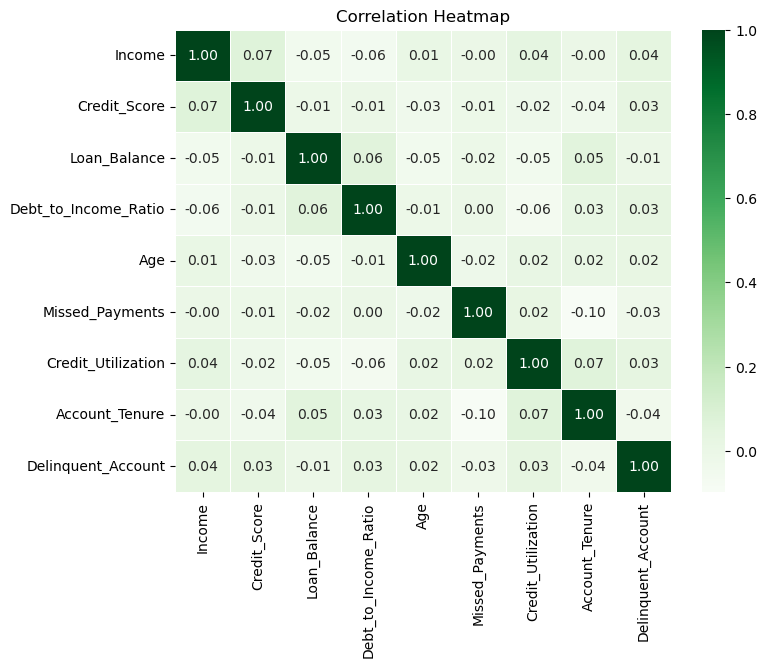

In [58]:
# Plot heatmap
# Select numerical columns
numeric_cols = ["Income", "Credit_Score", "Loan_Balance", 
                "Debt_to_Income_Ratio", "Age", "Missed_Payments", 
                "Credit_Utilization", "Account_Tenure"]

numeric_cols.append("Delinquent_Account")

# Calculate correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Greens", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
